In [1]:
import sys
sys.path.insert(0, '/home/users/brezovec/.local/lib/python3.6/site-packages/lib/python/')
import ants
import os
import bigbadbrain as bbb
import numpy as np
import matplotlib.pyplot as plt
import time
import scipy
import nibabel as nib
import psutil
%matplotlib inline

from mpl_toolkits.axes_grid1 import ImageGrid
from scipy import ndimage

In [2]:
dataset_path = "/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20190101_walking_dataset"

In [3]:
flies = ['fly_087', 'fly_089', 'fly_092', 'fly_093', 'fly_094', 'fly_096',
         'fly_097', 'fly_098', 'fly_099', 'fly_100', 'fly_101', 'fly_105', 'fly_106',
         'fly_110', 'fly_111']

In [3]:
flies = ['fly_087', 'fly_089', 'fly_092', 'fly_093', 'fly_094',
         'fly_097', 'fly_098', 'fly_100', 'fly_101', 'fly_105']

In [4]:
brains = {}
for fly in flies:
    try:
        #file = os.path.join(dataset_path, fly, 'warp', 'glm_Y-applied-meanbrain.nii')
        file = os.path.join(dataset_path, fly, 'warp', 'glm_Y-applied-meanbrain.nii')
        brains[fly] = np.asarray(nib.load(file).get_data(), dtype='float32')/1
        print(fly)
    except:
        print(fly + '_failed')

fly_087
fly_089
fly_092
fly_093
fly_094
fly_097
fly_098
fly_100
fly_101
fly_105


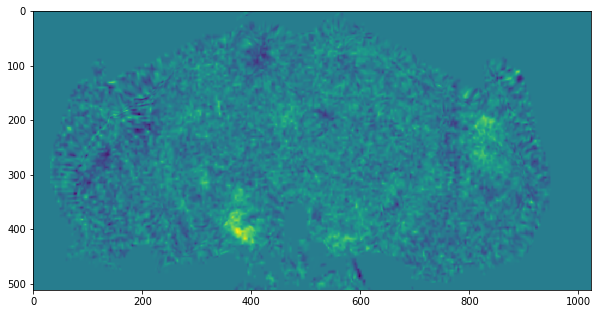

In [9]:
plt.figure(figsize=(10,10))
plt.imshow(brains['fly_087'][:,:,100].T)

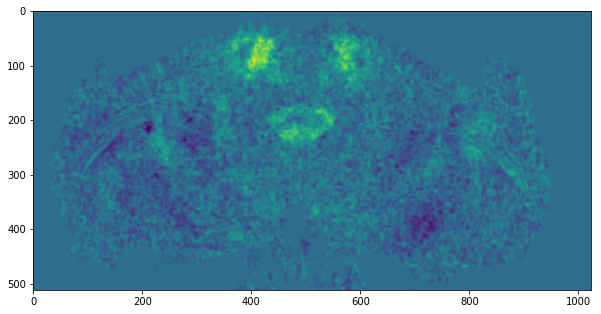

In [5]:
plt.figure(figsize=(10,10))
plt.imshow(brains['fly_087'][:,:,100].T)

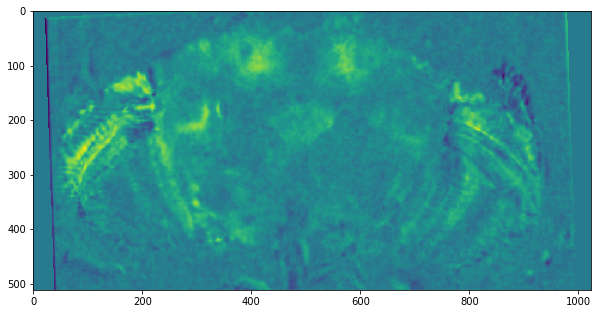

In [17]:
plt.figure(figsize=(10,10))
plt.imshow(brains['fly_087'][:,:,100].T)

In [35]:
keys = [x for x in brains.keys() if '_m-' not in x]

In [131]:
#remove fly 102 - looks a little wonky and want 15 + 1mean to fit nicely in figs
keys.remove('fly_102-to-seed_syn_1_mean.nii.nii')

In [134]:
keys.sort()

In [138]:
# add meanbrain
brains['meanbrain'] = meanbrain

In [139]:
keys.insert(0,'meanbrain')

In [140]:
keys

['meanbrain',
 'fly_087-to-seed_syn_1_mean.nii.nii',
 'fly_089-to-seed_syn_1_mean.nii.nii',
 'fly_092-to-seed_syn_1_mean.nii.nii',
 'fly_093-to-seed_syn_1_mean.nii.nii',
 'fly_094-to-seed_syn_1_mean.nii.nii',
 'fly_096-to-seed_syn_1_mean.nii.nii',
 'fly_097-to-seed_syn_1_mean.nii.nii',
 'fly_098-to-seed_syn_1_mean.nii.nii',
 'fly_099-to-seed_syn_1_mean.nii.nii',
 'fly_100-to-seed_syn_1_mean.nii.nii',
 'fly_101-to-seed_syn_1_mean.nii.nii',
 'fly_105-to-seed_syn_1_mean.nii.nii',
 'fly_106-to-seed_syn_1_mean.nii.nii',
 'fly_110-to-seed_syn_1_mean.nii.nii',
 'fly_111-to-seed_syn_1_mean.nii.nii']

In [ ]:
FB = [405:575,110:260,102]
PB = [400:575,200:300,60]
Optic_lobe = [700:925,225:425,110]
VLP = [225:375,150:300,120]
MB = [325:500,60:180,150]

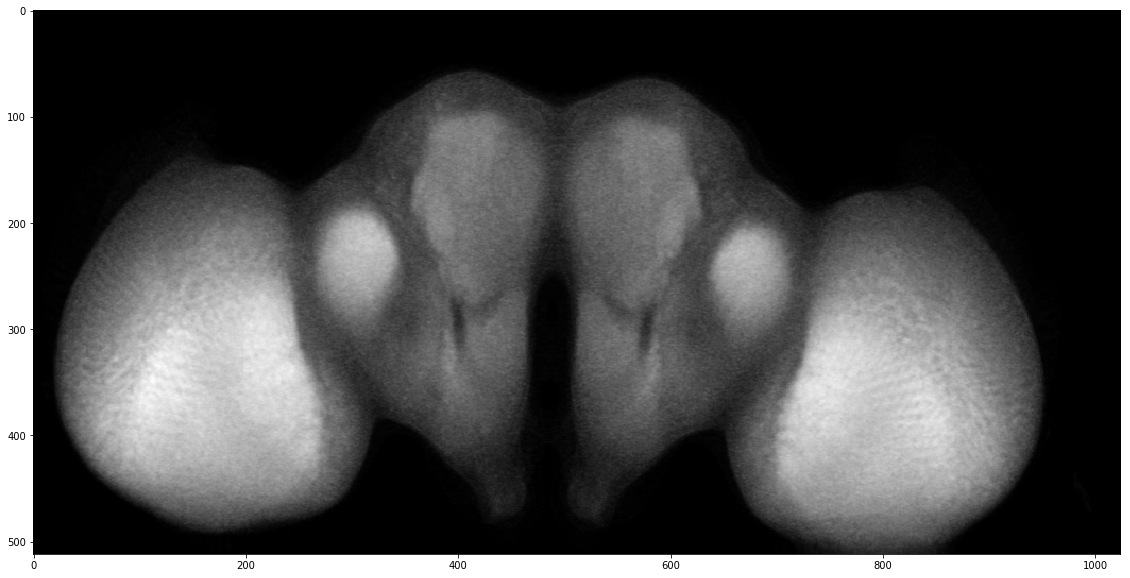

In [285]:
fig = plt.figure(figsize=(20,10))
plt.imshow(meanbrain[...,200].T,cmap='gray')
scalebar = ScaleBar(6.5*10**-7) # 1 pixel = 0.2 meter
#plt.gca().add_artist(scalebar)

save_path = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/figs'
timestr = time.strftime("%Y%m%d-%H%M%S")
fname = os.path.join(save_path, timestr)
#plt.savefig(fname,dpi=300,bbox_inches='tight')

In [22]:
flies = ['fly_087',
 'fly_089',
 'fly_092',
 'fly_093',
 'fly_094',
 'fly_096',
 'fly_097',
 'fly_098',
 'fly_099',
 'fly_100',
 'fly_101',
 'fly_105',
 'fly_106',
 'fly_110',
 'fly_111']

In [5]:
to_avg = []
for fly in flies:
    to_avg.append(brains[fly]/np.percentile(brains[fly],98))

In [6]:
meanbrain = np.mean(np.asarray(to_avg),axis=0)

In [7]:
save_file = "/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20201001_analysis/glm_Y_mean_abs.nii"

In [8]:
nib.Nifti1Image(np.abs(meanbrain), np.eye(4)).to_filename(save_file)

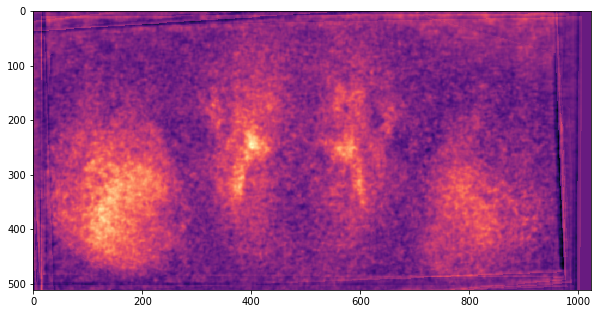

In [21]:
plt.figure(figsize=(10,10))
plt.imshow(meanbrain[:,:,200].T,cmap='magma')

(array([9.5574000e+04, 1.0374530e+06, 3.7528660e+06, 7.9127000e+06,
        9.6100456e+07, 1.9108885e+07, 5.0849730e+06, 1.0002190e+06,
        1.2125600e+05, 3.3460000e+03]),
 array([-0.24192569, -0.18528306, -0.12864044, -0.07199781, -0.01535519,
         0.04128744,  0.09793006,  0.15457269,  0.21121531,  0.26785794,
         0.32450056]),
 <a list of 10 Patch objects>)

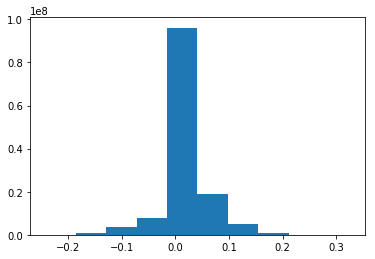

In [6]:
plt.hist(brains['fly_087'].flatten())

In [7]:
np.percentile(brains['fly_087'],98)

0.12651079088449468

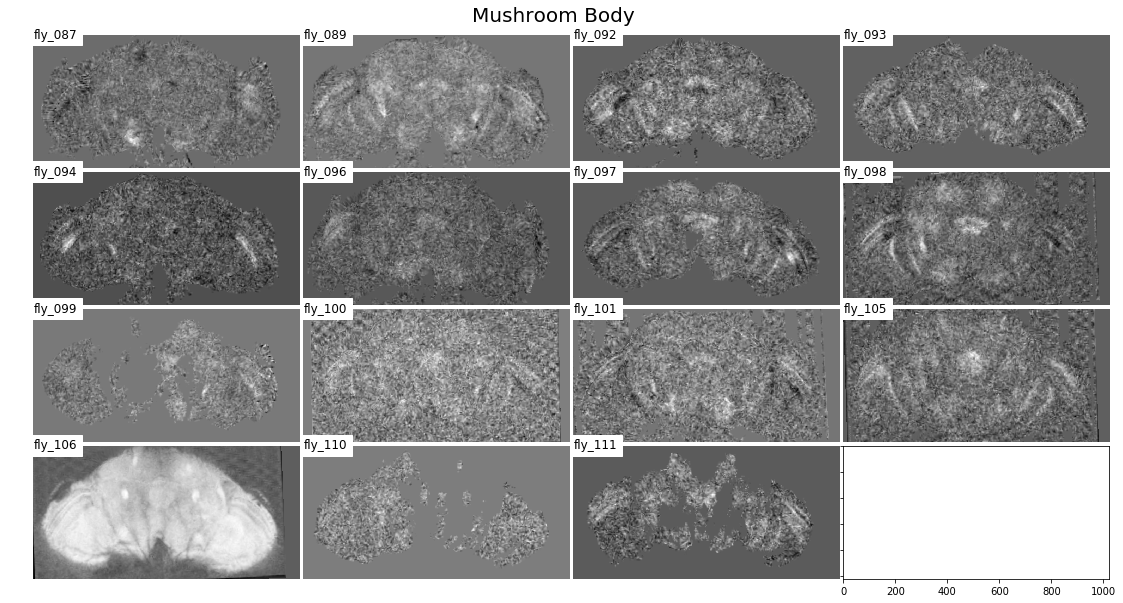

In [10]:
fig = plt.figure(figsize=(20,10))
grid = ImageGrid(fig, 111, nrows_ncols=(4, 4), axes_pad=.05)

for i,fly in enumerate(flies):
    grid[i].imshow(brains[fly][:,:,100].T,cmap='gray')
    grid[i].axis('off')
    grid[i].text(x=4,y=11,s=fly,fontsize=12,backgroundcolor='white')
    #if i == 0:
        #scalebar = ScaleBar(6.5*10**-7, location='upper right')
        #grid[i].add_artist(scalebar)
plt.suptitle(x=.5, y=.92, t='Mushroom Body', fontsize=20)

save_path = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/figs'
timestr = time.strftime("%Y%m%d-%H%M%S")
fname = os.path.join(save_path, timestr)
#plt.savefig(fname,dpi=300,bbox_inches='tight')

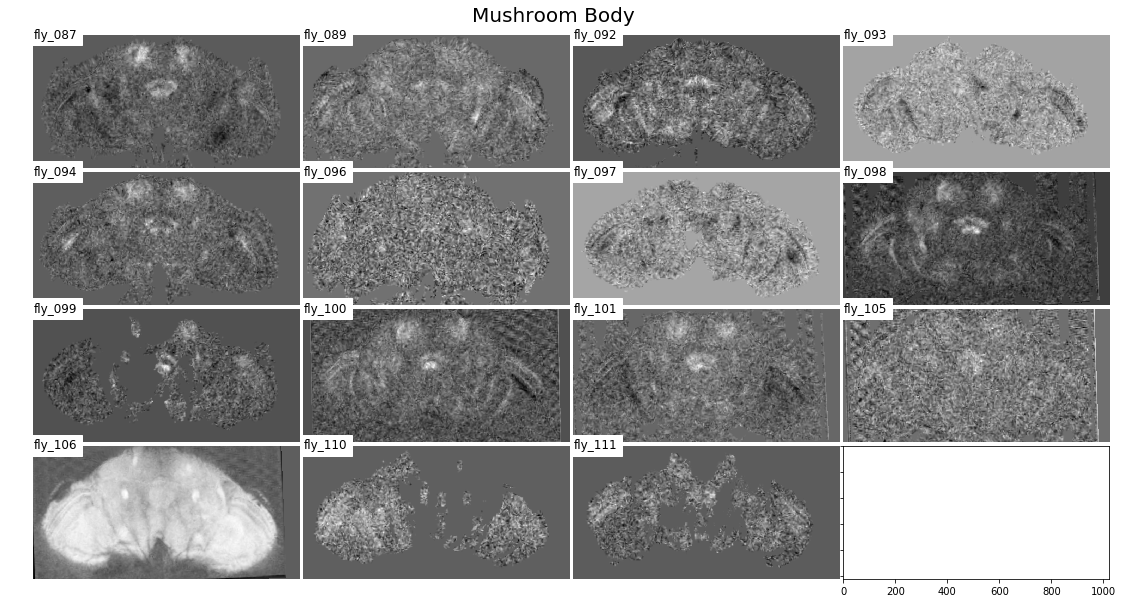

In [7]:
fig = plt.figure(figsize=(20,10))
grid = ImageGrid(fig, 111, nrows_ncols=(4, 4), axes_pad=.05)

for i,fly in enumerate(flies):
    grid[i].imshow(brains[fly][:,:,100].T,cmap='gray')
    grid[i].axis('off')
    grid[i].text(x=4,y=11,s=fly,fontsize=12,backgroundcolor='white')
    #if i == 0:
        #scalebar = ScaleBar(6.5*10**-7, location='upper right')
        #grid[i].add_artist(scalebar)
plt.suptitle(x=.5, y=.92, t='Mushroom Body', fontsize=20)

save_path = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/figs'
timestr = time.strftime("%Y%m%d-%H%M%S")
fname = os.path.join(save_path, timestr)
#plt.savefig(fname,dpi=300,bbox_inches='tight')

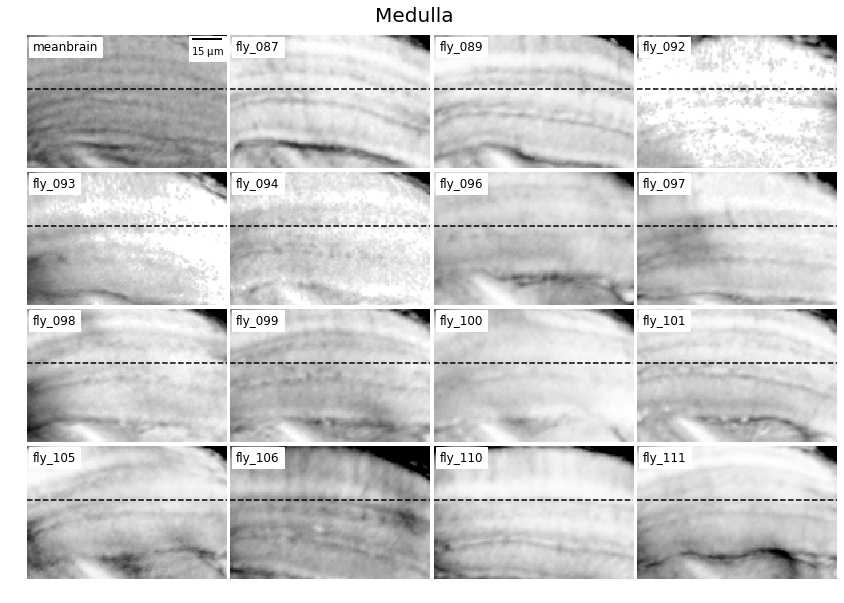

In [260]:
fig = plt.figure(figsize=(20,10))
grid = ImageGrid(fig, 111, nrows_ncols=(4, 4), axes_pad=.05)

for i,key in enumerate(keys):
    to_plot = ndimage.rotate(brains[key][...,110], -50)[230:330,775:925]
    grid[i].imshow(to_plot,cmap='gray',vmin=.7,vmax=1)
    grid[i].axis('off')
    grid[i].text(x=4,y=11,s='{}'.format(key.split('-')[0]),fontsize=12,backgroundcolor='white')
    if i == 0:
        scalebar = ScaleBar(6.5*10**-7, location='upper right')
        grid[i].add_artist(scalebar)
    grid[i].axhline(40,linestyle='--',color='k')
plt.suptitle(x=.5, y=.92, t='Medulla', fontsize=20)

save_path = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/figs'
timestr = time.strftime("%Y%m%d-%H%M%S")
fname = os.path.join(save_path, timestr)
plt.savefig(fname,dpi=300,bbox_inches='tight')

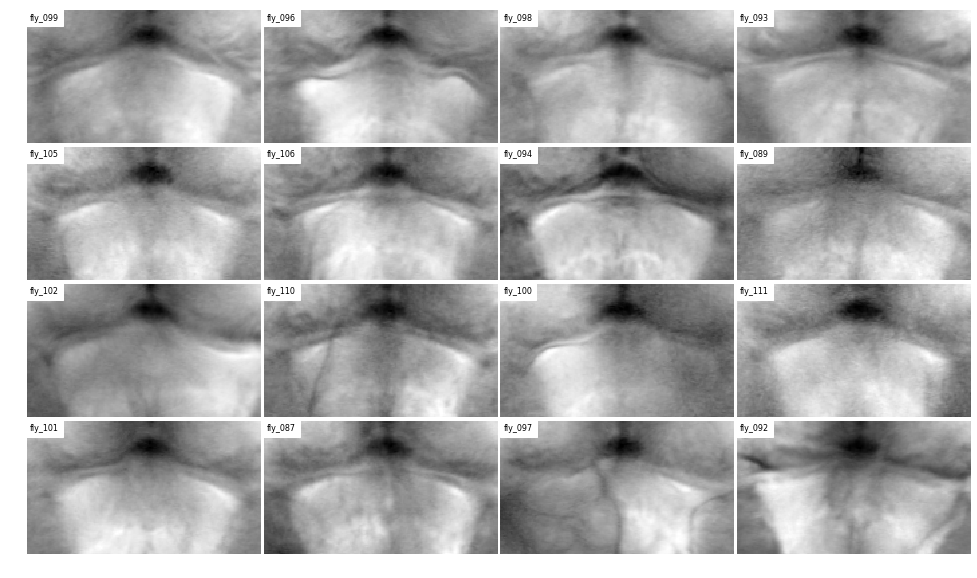

In [110]:
fig = plt.figure(figsize=(20,10))
grid = ImageGrid(fig, 111, nrows_ncols=(4, 4), axes_pad=0.05)

for i,key in enumerate(keys):
    grid[i].imshow(brains[key][400:575,100:200,100].T,cmap='gray')
    grid[i].axis('off')
    grid[i].text(x=2,y=7,s='{}'.format(key.split('-')[0]),fontsize=8,backgroundcolor='white')